<a href="https://colab.research.google.com/github/SaiSrujana-Chinthana/Real-Time-Stock-Price-Prediction/blob/main/Real_Time_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance tensorflow scikit-learn


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [ ]:
data = yf.download("AAPL", start="2015-01-01", end="2023-12-31")
data = data[['Close']]
data.head()


/tmp/ipython-input-3580174836.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2015-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2015-01-02,24.214891
2015-01-05,23.532721
2015-01-06,23.534935
2015-01-07,23.864952
2015-01-08,24.781897


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)



In [ ]:
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

X = X.reshape(X.shape[0], X.shape[1], 1)


In [ ]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=32)


Epoch 1/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0222
Epoch 2/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 5.2830e-04
Epoch 3/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - loss: 3.6331e-04
Epoch 4/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 3.7061e-04
Epoch 5/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 3.6927e-04


In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


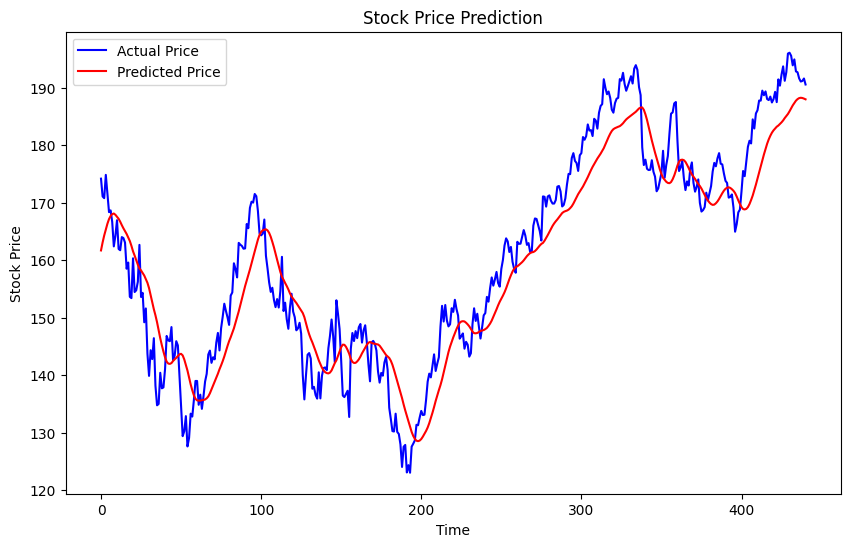

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test_actual, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
